In [41]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
dataset_names = ["h9", "mb", "pc3"]
dataset_name = dataset_names[2]

In [42]:
df = pd.read_pickle(dataset_name + "_df.pkl")
df = df.T
df

,ABCF1,ALAS1,ANLN,ARL6IP1,ATF2,BCL6,BIRC5,BMP1,BTBD3,BUB1,C15orf23,C1QB,C1R,C1S,C1orf63,C3AR1,C4A,C5,C6,CASP3,CASP8AP2,CCL11,CCL13,CCL16,CCL19,CCL22,CCL24,CCL8,CCNA2,CCNB2,CCNE1,CCNF,CCR1,CCR3,CCR7,CD40,CD40LG,CD55,CDC20,CDC25B,...,RHNO1,RHOA,RIPK1,RIPK2,ROCK2,RPL19,RPS6KA5,SAPCD2,SERPING1,SLBP,SLC17A2,SMTN,SREK1,STAT1,TBP,TFRC,TGFB1,TGFB3,TGFBR1,TLR1,TLR3,TLR4,TNF,TOLLIP,TOP2A,TPX2,TRAF2,TTC38,TTK,TUBB,UBE2C,UNG,USP1,VANGL1,VCAM1,VPS25,WDR76,ZC3HC1,ZNF367,ZRANB2
1 PC3AA,12.455756,11.277492,9.055545,11.900310,10.095712,13.061100,8.479780,12.715235,12.020281,2.143723,10.221324,5.807355,12.201235,7.396348,12.187081,3.906891,8.761969,13.088560,3.700440,3.450686,3.890122,4.643856,5.487427,4.459432,4.401068,4.219069,7.796347,4.700440,3.053744,4.555812,10.733621,10.409901,3.489309,4.954196,4.247928,3.569711,4.169925,6.145338,8.468115,6.140310,...,10.395252,16.122889,9.175375,13.699467,15.021610,19.111898,10.462123,4.088897,3.816952,7.041731,3.584963,8.878123,11.709739,6.276312,8.482810,14.536122,10.936108,3.962061,12.516321,7.248772,3.271834,3.807355,4.459432,9.121463,3.684505,8.598780,9.779138,10.295833,3.807355,16.395882,3.408657,12.745883,13.845462,12.375026,3.429903,8.230580,4.110806,8.473012,2.699516,7.853925
1 PC3AD,12.856352,9.562649,10.247306,10.719140,3.219969,11.417304,13.932170,10.557355,11.316154,4.233406,10.169476,3.906891,10.664355,6.929567,12.309320,7.847998,5.044394,8.656903,4.247928,9.835846,6.129555,5.044394,5.594342,4.700440,3.953609,3.634106,4.754888,4.584963,4.153280,11.025054,3.807355,3.835120,4.167381,4.700440,3.807355,8.006310,3.000000,4.145338,12.086827,10.004822,...,10.695097,16.317448,4.083641,11.371283,15.484037,18.557837,11.133374,10.861090,2.942482,7.903701,3.807355,9.607976,11.684563,8.191330,8.179168,15.557069,11.304839,5.650498,10.244449,4.392317,4.786407,3.906891,3.459432,7.974622,6.255135,10.454391,7.398996,9.295833,4.321928,18.341618,4.198057,14.328199,13.621554,9.905882,3.889334,8.641117,10.126341,7.246646,8.555616,9.571181
1 PC3AE,13.178574,11.942969,8.329539,9.759218,4.920408,12.725792,8.321928,11.678791,10.839593,4.998941,10.244698,3.906891,8.500420,9.336476,11.059277,4.459432,7.957395,11.617919,4.087463,8.848961,4.579358,5.087463,5.487427,4.643856,4.301532,4.219069,4.857981,4.247928,4.705821,5.140775,10.679429,9.574960,4.415308,4.523562,3.459432,7.137555,4.247928,6.981839,11.790043,10.532627,...,10.114631,16.472177,10.783545,13.794720,15.527036,18.526898,9.193634,9.238039,3.164875,9.189251,3.906891,9.645512,11.908991,9.836612,8.160882,15.612527,11.973300,9.268251,11.254387,4.906891,3.923911,3.807355,4.392317,11.159104,6.453892,9.671349,6.218423,11.321113,7.867197,17.293564,8.159249,14.090005,12.542372,9.038098,4.130342,8.709912,7.502646,9.824163,2.436482,3.321928
1 PC3BD,12.560438,10.534790,6.672425,11.893167,9.595616,11.372674,4.431659,10.292949,10.607266,4.127171,9.945022,4.943629,12.556512,8.462943,11.271213,5.058272,6.160724,4.523562,5.149933,10.449617,7.893597,5.755645,6.046138,4.720703,4.857588,3.748569,5.707687,5.342307,4.764787,4.406973,3.725868,9.049973,4.910656,4.839348,4.162758,8.735362,5.602102,4.613096,5.438348,3.827537,...,9.989932,15.919916,10.740126,14.005353,13.173726,18.711943,7.415683,8.326247,3.793613,8.702857,4.109168,11.819353,12.846285,9.199448,9.429467,16.108977,10.435090,5.036740,8.009526,5.347472,5.099844,4.228791,5.059438,11.149656,4.626841,10.626822,7.054094,4.292603,3.433923,17.621401,4.000000,14.033900,14.786460,12.527175,3.857346,9.020684,3.922617,9.355808,3.807355,4.593524
1 PC3BE,12.702749,10.758078,8.435818,2.603410,9.211145,3.642866,1.846697,5.672425,2.815203,2.199742,10.217349,1.551312,4.314980,3.236263,11.983989,10.068608,10.303856,3.169925,3.365661,1.080381,2.940137,4.296213,4.368066,3.398775,3.179516,2.333531,8.683071,4.079273,3.999252,2.822010,1.555943,2.663708,3.688263,2.379917,5.037227,2.321928,2.017139,3.028133,4.990889,2.564503,...,3.489738,13.163705,2.970133,3.991934,14.777760,17.318446,5.731185,3.370023,2.378575,6.680489,2.993691,10.659036,11.1306

In [43]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 361 samples in 0.001s...
[t-SNE] Computed neighbors for 361 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 361 / 361
[t-SNE] Mean sigma: 11.996261
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.962799
[t-SNE] KL divergence after 300 iterations: 0.641960


In [44]:
legend = pd.read_pickle(dataset_name + "_cpt.pkl")
legend

,cycle
1 PC3AA,g0/g1
1 PC3AD,g0/g1
1 PC3AE,g0/g1
1 PC3BD,g0/g1
1 PC3BE,g0/g1
...,...
9 PC3BC,g0/g1
9 PC3BD,g0/g1
9 PC3BE,g0/g1
9 PC3BF,s


In [45]:
df = df.merge(legend, left_index=True, right_index=True)
df

,ABCF1,ALAS1,ANLN,ARL6IP1,ATF2,BCL6,BIRC5,BMP1,BTBD3,BUB1,C15orf23,C1QB,C1R,C1S,C1orf63,C3AR1,C4A,C5,C6,CASP3,CASP8AP2,CCL11,CCL13,CCL16,CCL19,CCL22,CCL24,CCL8,CCNA2,CCNB2,CCNE1,CCNF,CCR1,CCR3,CCR7,CD40,CD40LG,CD55,CDC20,CDC25B,...,RHOA,RIPK1,RIPK2,ROCK2,RPL19,RPS6KA5,SAPCD2,SERPING1,SLBP,SLC17A2,SMTN,SREK1,STAT1,TBP,TFRC,TGFB1,TGFB3,TGFBR1,TLR1,TLR3,TLR4,TNF,TOLLIP,TOP2A,TPX2,TRAF2,TTC38,TTK,TUBB,UBE2C,UNG,USP1,VANGL1,VCAM1,VPS25,WDR76,ZC3HC1,ZNF367,ZRANB2,cycle
1 PC3AA,12.455756,11.277492,9.055545,11.900310,10.095712,13.061100,8.479780,12.715235,12.020281,2.143723,10.221324,5.807355,12.201235,7.396348,12.187081,3.906891,8.761969,13.088560,3.700440,3.450686,3.890122,4.643856,5.487427,4.459432,4.401068,4.219069,7.796347,4.700440,3.053744,4.555812,10.733621,10.409901,3.489309,4.954196,4.247928,3.569711,4.169925,6.145338,8.468115,6.140310,...,16.122889,9.175375,13.699467,15.021610,19.111898,10.462123,4.088897,3.816952,7.041731,3.584963,8.878123,11.709739,6.276312,8.482810,14.536122,10.936108,3.962061,12.516321,7.248772,3.271834,3.807355,4.459432,9.121463,3.684505,8.598780,9.779138,10.295833,3.807355,16.395882,3.408657,12.745883,13.845462,12.375026,3.429903,8.230580,4.110806,8.473012,2.699516,7.853925,g0/g1
1 PC3AD,12.856352,9.562649,10.247306,10.719140,3.219969,11.417304,13.932170,10.557355,11.316154,4.233406,10.169476,3.906891,10.664355,6.929567,12.309320,7.847998,5.044394,8.656903,4.247928,9.835846,6.129555,5.044394,5.594342,4.700440,3.953609,3.634106,4.754888,4.584963,4.153280,11.025054,3.807355,3.835120,4.167381,4.700440,3.807355,8.006310,3.000000,4.145338,12.086827,10.004822,...,16.317448,4.083641,11.371283,15.484037,18.557837,11.133374,10.861090,2.942482,7.903701,3.807355,9.607976,11.684563,8.191330,8.179168,15.557069,11.304839,5.650498,10.244449,4.392317,4.786407,3.906891,3.459432,7.974622,6.255135,10.454391,7.398996,9.295833,4.321928,18.341618,4.198057,14.328199,13.621554,9.905882,3.889334,8.641117,10.126341,7.246646,8.555616,9.571181,g0/g1
1 PC3AE,13.178574,11.942969,8.329539,9.759218,4.920408,12.725792,8.321928,11.678791,10.839593,4.998941,10.244698,3.906891,8.500420,9.336476,11.059277,4.459432,7.957395,11.617919,4.087463,8.848961,4.579358,5.087463,5.487427,4.643856,4.301532,4.219069,4.857981,4.247928,4.705821,5.140775,10.679429,9.574960,4.415308,4.523562,3.459432,7.137555,4.247928,6.981839,11.790043,10.532627,...,16.472177,10.783545,13.794720,15.527036,18.526898,9.193634,9.238039,3.164875,9.189251,3.906891,9.645512,11.908991,9.836612,8.160882,15.612527,11.973300,9.268251,11.254387,4.906891,3.923911,3.807355,4.392317,11.159104,6.453892,9.671349,6.218423,11.321113,7.867197,17.293564,8.159249,14.090005,12.542372,9.038098,4.130342,8.709912,7.502646,9.824163,2.436482,3.321928,g0/g1
1 PC3BD,12.560438,10.534790,6.672425,11.893167,9.595616,11.372674,4.431659,10.292949,10.607266,4.127171,9.945022,4.943629,12.556512,8.462943,11.271213,5.058272,6.160724,4.523562,5.149933,10.449617,7.893597,5.755645,6.046138,4.720703,4.857588,3.748569,5.707687,5.342307,4.764787,4.406973,3.725868,9.049973,4.910656,4.839348,4.162758,8.735362,5.602102,4.613096,5.438348,3.827537,...,15.919916,10.740126,14.005353,13.173726,18.711943,7.415683,8.326247,3.793613,8.702857,4.109168,11.819353,12.846285,9.199448,9.429467,16.108977,10.435090,5.036740,8.009526,5.347472,5.099844,4.228791,5.059438,11.149656,4.626841,10.626822,7.054094,4.292603,3.433923,17.621401,4.000000,14.033900,14.786460,12.527175,3.857346,9.020684,3.922617,9.355808,3.807355,4.593524,g0/g1
1 PC3BE,12.702749,10.758078,8.435818,2.603410,9.211145,3.642866,1.846697,5.672425,2.815203,2.199742,10.217349,1.551312,4.314980,3.236263,11.983989,10.068608,10.303856,3.169925,3.365661,1.080381,2.940137,4.296213,4.368066,3.398775,3.179516,2.333531,8.683071,4.079273,3.999252,2.822010,1.555943,2.663708,3.688263,2.379917,5.037227,2.321928,2.017139,3.028133,4.990889,2.564503,...,13.163705,2.970133,3.991934,14.777760,17.318446,5.731185,3.370023,2.378575,6.680489,2.993691,10.659036,11.130671,2.584963,9.513792,14.

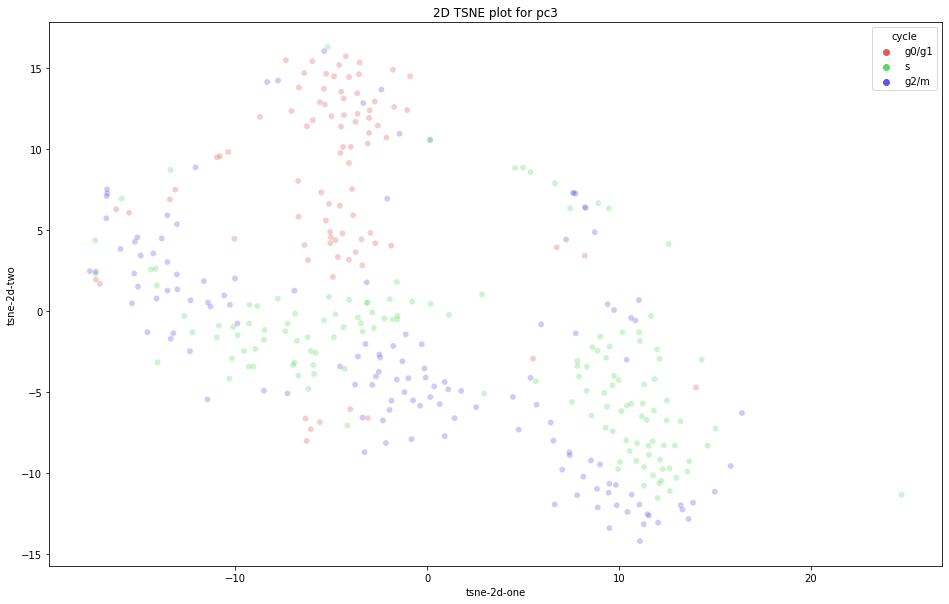

In [46]:
df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue= df.cycle,
    palette=sns.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=0.3
)
plt.title('2D TSNE plot for ' + dataset_name)
plt.savefig(dataset_name + "_tsne_plot.jpg")